In [1]:
print("hello world")

hello world


# **Ransome analysis using ML and DL**

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from keras.models import  Sequential
from keras.layers import Dense
import keras.activations,keras.losses
import numpy as np
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

# **Data grabbing**

In [3]:
lab=LabelEncoder()
data=pd.read_csv('/kaggle/input/ugransome-dataset/final(2).csv')
print(data.columns)
print(data.info())
print(data.isna().sum())
print(data.describe())

Index(['Time', 'Protcol', 'Flag', 'Family', 'Clusters', 'SeddAddress',
       'ExpAddress', 'BTC', 'USD', 'Netflow_Bytes', 'IPaddress', 'Threats',
       'Port', 'Prediction'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149043 entries, 0 to 149042
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Time           149043 non-null  int64 
 1   Protcol        149043 non-null  object
 2   Flag           149043 non-null  object
 3   Family         149043 non-null  object
 4   Clusters       149043 non-null  int64 
 5   SeddAddress    149043 non-null  object
 6   ExpAddress     149043 non-null  object
 7   BTC            149043 non-null  int64 
 8   USD            149043 non-null  int64 
 9   Netflow_Bytes  149043 non-null  int64 
 10  IPaddress      149043 non-null  object
 11  Threats        149043 non-null  object
 12  Port           149043 non-null  int64 
 13  Prediction     149043 non

# **grabbing the Object column**

In [4]:
new=[]
for i in data.select_dtypes(include='object').columns.values:
    if len(data[i].value_counts().values) < 10:
        new.append(i)

# **Type conversion and its analysis**

In [5]:
lab=LabelEncoder()
for i in data[new]:
    data[i]=lab.fit_transform(data[i])

print(data.info())


print(data['Family'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149043 entries, 0 to 149042
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Time           149043 non-null  int64 
 1   Protcol        149043 non-null  int64 
 2   Flag           149043 non-null  int64 
 3   Family         149043 non-null  object
 4   Clusters       149043 non-null  int64 
 5   SeddAddress    149043 non-null  int64 
 6   ExpAddress     149043 non-null  int64 
 7   BTC            149043 non-null  int64 
 8   USD            149043 non-null  int64 
 9   Netflow_Bytes  149043 non-null  int64 
 10  IPaddress      149043 non-null  int64 
 11  Threats        149043 non-null  int64 
 12  Port           149043 non-null  int64 
 13  Prediction     149043 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 15.9+ MB
None
Family
Locky               25062
SamSam              19657
WannaCry            16110
JigSaw              13712
Flyper           

# **Outlier detection and deduction**

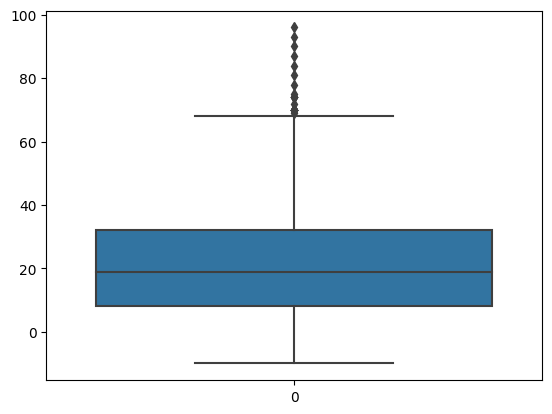

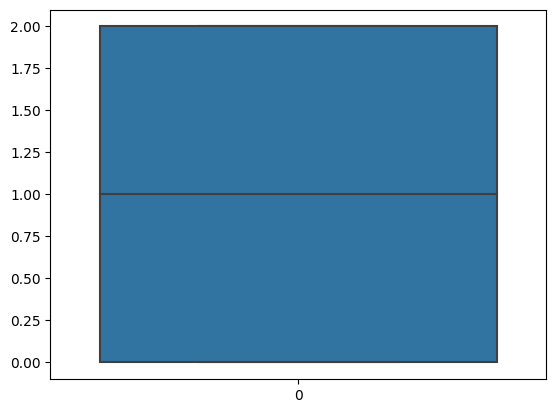

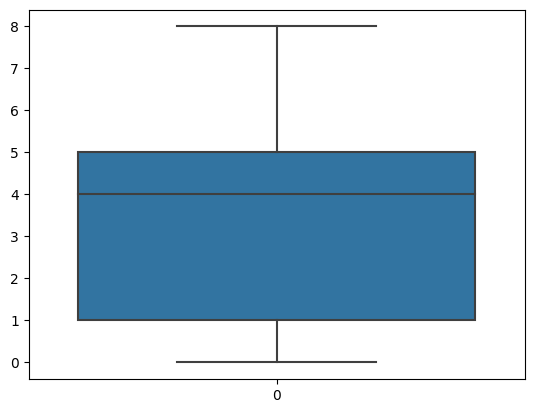

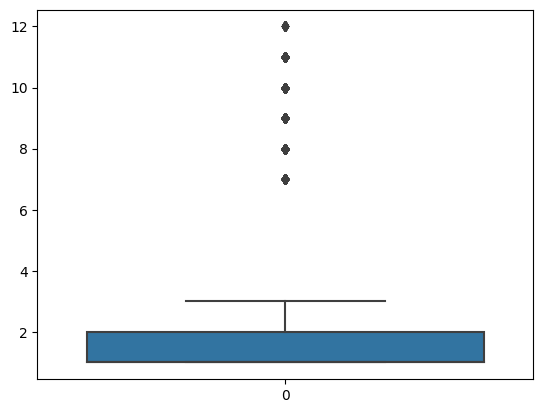

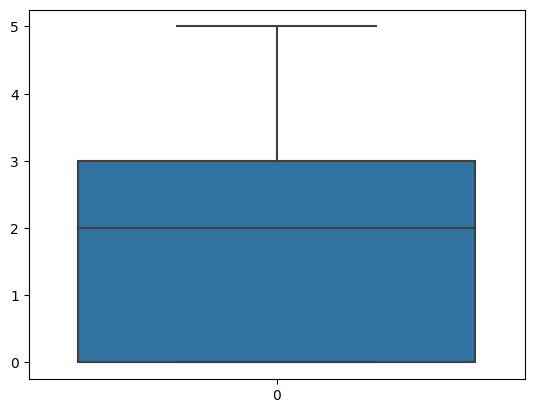

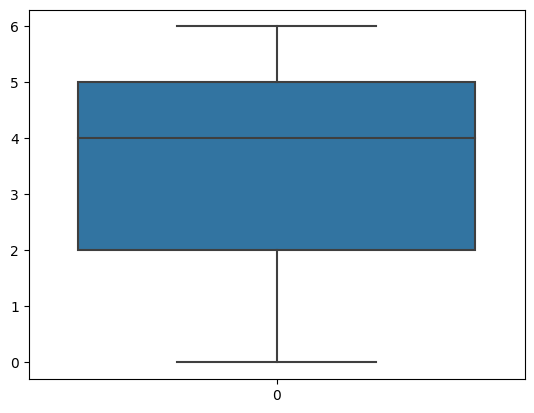

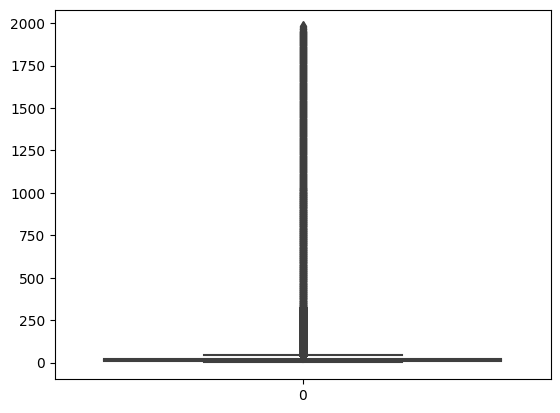

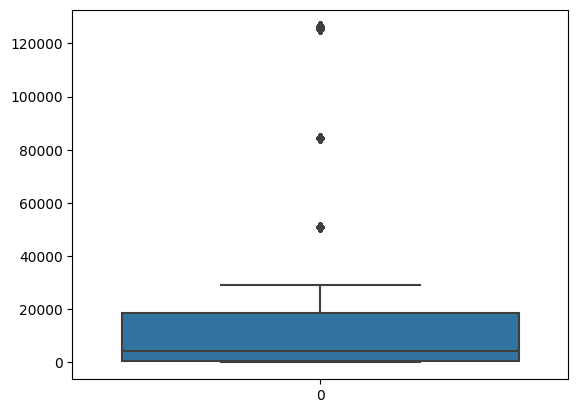

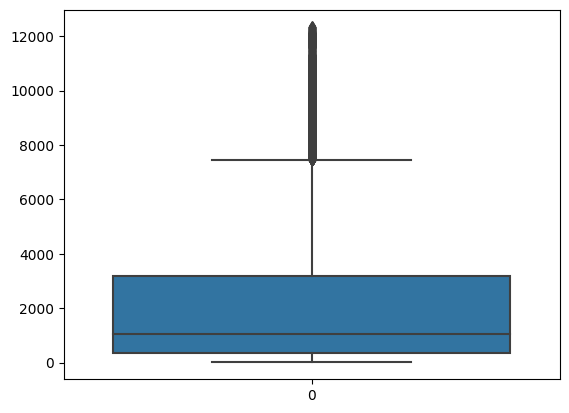

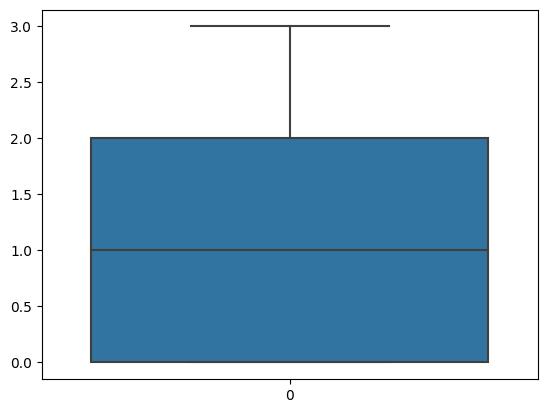

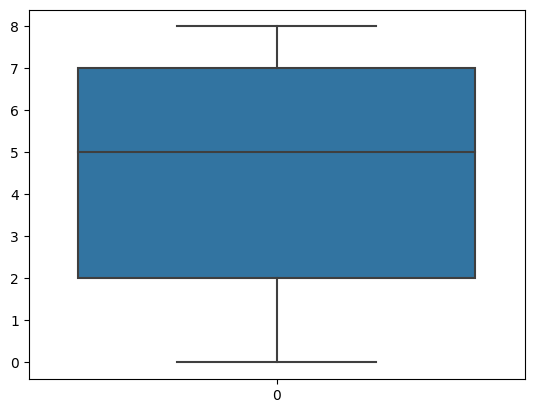

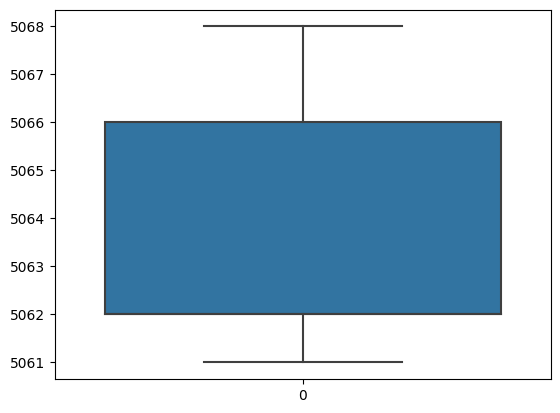

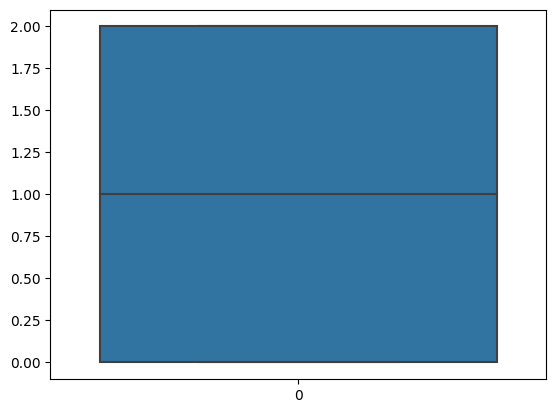

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149043 entries, 0 to 149042
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Time           149043 non-null  int64  
 1   Protcol        149043 non-null  int64  
 2   Flag           149043 non-null  int64  
 3   Family         149043 non-null  object 
 4   Clusters       149043 non-null  int64  
 5   SeddAddress    149043 non-null  int64  
 6   ExpAddress     149043 non-null  int64  
 7   BTC            149043 non-null  int64  
 8   USD            149043 non-null  int64  
 9   Netflow_Bytes  149043 non-null  int64  
 10  IPaddress      149043 non-null  int64  
 11  Threats        149043 non-null  int64  
 12  Port           149043 non-null  int64  
 13  Prediction     149043 non-null  int64  
 14  z-scores       149043 non-null  float64
dtypes: float64(1), int64(13), object(1)
memory usage: 17.1+ MB
None
149043
111976


In [6]:
for i in data.select_dtypes(include='number').columns.values:
    sn.boxplot(data[i])
    plt.show()

info={}
for i in data.select_dtypes(include='number').columns.values:
    data['z-scores']=(data[i]-data[i].mean())/data[i].std()
    outlier=np.abs(data['z-scores'] >3).sum()
    if outlier >0:
        info[i]=outlier

print(data.info())

print(len(data))
threshold=2
for x,y in info.items():
    upper=data[x].mean()+threshold*data[x].std()
    lower=data[x].mean()-threshold*data[x].std()
    data=data[(data[x]>lower)&(data[x]<upper)]

print(len(data))


# **Data transformation and finding the optimal correlation**

In [7]:
data['Family']=lab.fit_transform(data['Family'])


values={}
for i in data.columns.values:
    cnt=0
    corri=data.corr()[i]
    corri=corri.drop(['z-scores',i])
    for j in corri.index:
        if corri[j] <0:
            cnt +=1

    values[i]=cnt

print(values)


{'Time': 9, 'Protcol': 8, 'Flag': 6, 'Family': 6, 'Clusters': 10, 'SeddAddress': 7, 'ExpAddress': 5, 'BTC': 9, 'USD': 8, 'Netflow_Bytes': 6, 'IPaddress': 5, 'Threats': 9, 'Port': 7, 'Prediction': 9, 'z-scores': 9}


# **Correlation analysis**

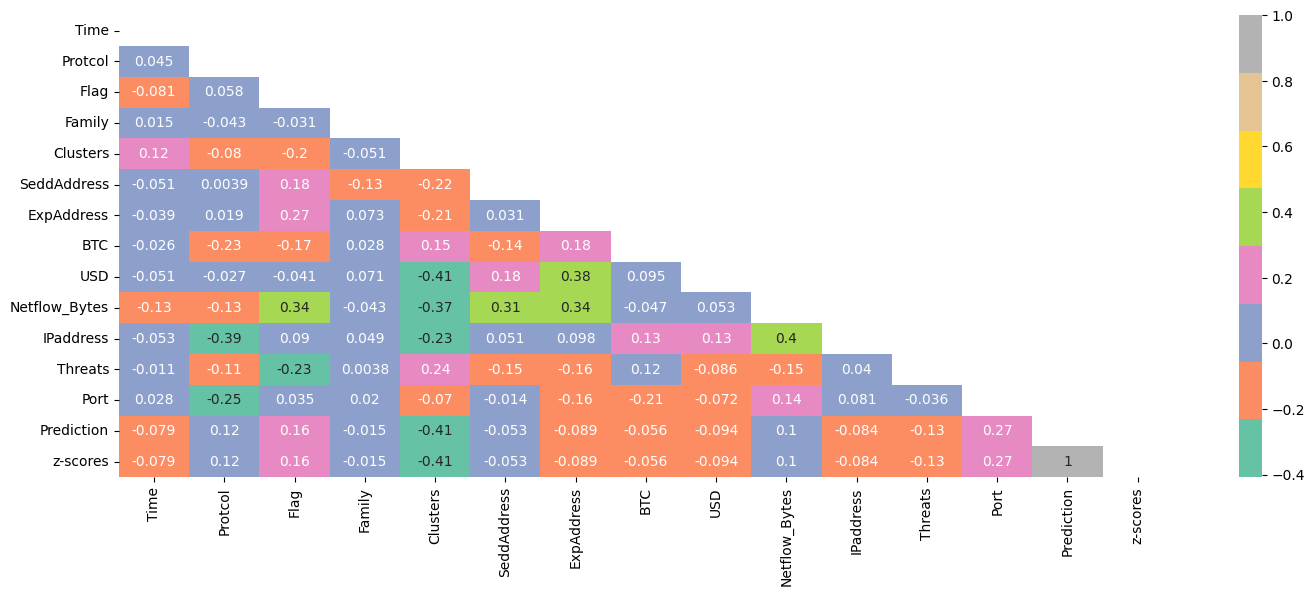

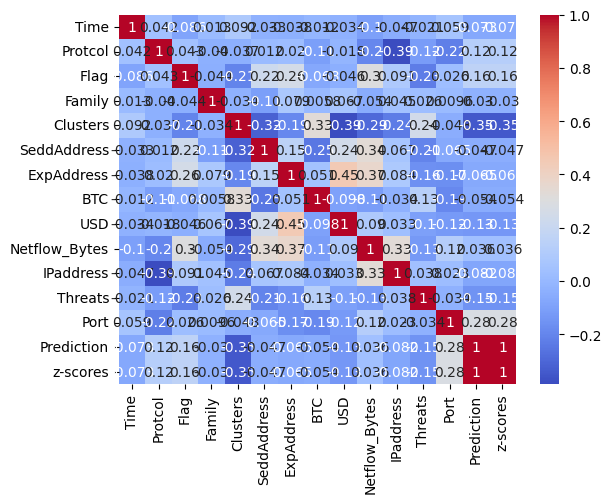

In [8]:
plt.figure(figsize=(17, 6))
corr = data.corr(method='spearman')
my_m = np.triu(corr)
sn.heatmap(corr, mask=my_m, annot=True, cmap="Set2")
plt.show()

correlation_matrix = data.corr()
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# **Analysis using Machine Learning for optimal correlated column**

In [9]:
x=[]
y=[]
print("The prediction for FLAG column in data set")
corri = data.corr()['Flag']
corri = corri.drop(['z-scores', 'Flag'])
x_train,x_test,y_train,y_test=train_test_split(data[corri.index],data['Flag'])
lr = LogisticRegression(max_iter=200)
lr.fit(x_train, y_train)
print(f'The logistic regression: for  column ', lr.score(x_test, y_test))

lgb = LGBMClassifier()
lgb.fit(x_train, y_train)
print(f'The LGB for column', lgb.score(x_test, y_test))

tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree.fit(x_train, y_train)
print(f'Dtree for  column', tree.score(x_test,y_test))

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
print(f'The Linear SVC column ',linear_svc.score(x_test,y_test))

mlp_classifier = MLPClassifier()
mlp_classifier.fit(x_train, y_train)
print(f'The MLP classifiers  column',mlp_classifier.score(x_test,y_test))

x=[]
y=[]
print("The prediction for Protcol column in data set")
corri = data.corr()['Protcol']
corri = corri.drop(['z-scores', 'Protcol'])
x_train,x_test,y_train,y_test=train_test_split(data[corri.index],data['Protcol'])
lr = LogisticRegression(max_iter=200)
lr.fit(x_train, y_train)
print(f'The logistic regression: for column ', lr.score(x_test, y_test))

lgb = LGBMClassifier()
lgb.fit(x_train, y_train)
print(f'The LGB for  column', lgb.score(x_test, y_test))

tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree.fit(x_train, y_train)
print(f'Dtree for column', tree.score(x_test,y_test))

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
print(f'The Linear SVC column ',linear_svc.score(x_test,y_test))

mlp_classifier = MLPClassifier()
mlp_classifier.fit(x_train, y_train)
print(f'The MLP classifiers column',mlp_classifier.score(x_test,y_test))

The prediction for FLAG column in data set


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The logistic regression: for  column  0.43305708366078444
The LGB for column 0.9984639565621205
Dtree for  column 0.9257698078159605


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The Linear SVC column  0.5086804315210403
The MLP classifiers  column 0.9717439451310995
The prediction for Protcol column in data set


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The logistic regression: for column  0.5891262413374294
The LGB for  column 0.9957133671501036
Dtree for column 0.9170179324140887


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The Linear SVC column  0.4103379295563335
The MLP classifiers column 0.9306994355933415


# **Deep Learning Analysis for Protocols Column**

Epoch 1/60
4200/4200 [==============================] - 11s 2ms/step - loss: 1.0627 - accuracy: 0.4268
Epoch 2/60
4200/4200 [==============================] - 9s 2ms/step - loss: 1.0167 - accuracy: 0.4509
Epoch 3/60
4200/4200 [==============================] - 9s 2ms/step - loss: 0.8866 - accuracy: 0.5497
Epoch 4/60
4200/4200 [==============================] - 8s 2ms/step - loss: 0.8083 - accuracy: 0.5812
Epoch 5/60
4200/4200 [==============================] - 8s 2ms/step - loss: 0.7938 - accuracy: 0.5817
Epoch 6/60
4200/4200 [==============================] - 9s 2ms/step - loss: 0.7812 - accuracy: 0.5871
Epoch 7/60
4200/4200 [==============================] - 9s 2ms/step - loss: 0.7658 - accuracy: 0.5862
Epoch 8/60
4200/4200 [==============================] - 9s 2ms/step - loss: 0.7455 - accuracy: 0.6000
Epoch 9/60
4200/4200 [==============================] - 9s 2ms/step - loss: 0.7244 - accuracy: 0.6405
Epoch 10/60
4200/4200 [==============================] - 9s 2ms/step - loss: 0.71

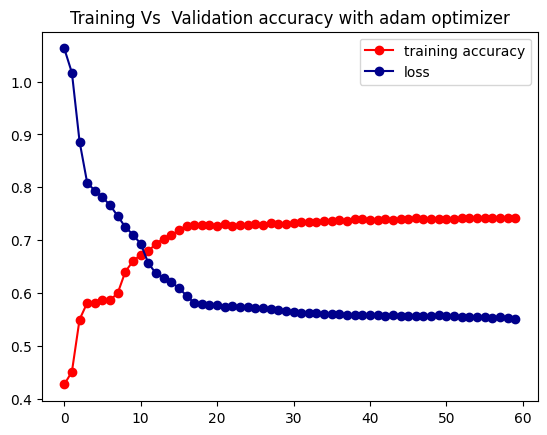

In [10]:
X=[]
Y=pd.get_dummies(data['Protcol'])

corr=data.corr()['Protcol']
corr=corr.drop(['z-scores','Protcol'])
for i in corr.index:
    if corr[i]> 0:
        X.append(i)

x_train,x_test,y_train,y_test=train_test_split(data[X],Y)

models=Sequential()
models.add(Dense(units=data[X].shape[1],input_dim=data[X].shape[1],activation=keras.activations.softmax))
models.add(Dense(units=data[X].shape[1],activation=keras.activations.relu))
models.add(Dense(units=data[X].shape[1],activation=keras.activations.relu))
models.add(Dense(units=data[X].shape[1],activation=keras.activations.relu))
models.add(Dense(units=data[X].shape[1],activation=keras.activations.softmax))
models.add(Dense(units=Y.shape[1],activation=keras.activations.softmax))
models.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics='accuracy')
hist=models.fit(x_train,y_train,batch_size=20,epochs=60)
plt.plot(hist.history['accuracy'], label='training accuracy', marker='o', color='red')
plt.plot(hist.history['loss'], label='loss', marker='o', color='darkblue')
plt.title('Training Vs  Validation accuracy with adam optimizer')
plt.legend()
plt.show()